# random forest

In [ ]:
best_model = joblib.load(r'C:\Users\amahe\Downloads\DT.joblib')
best_model

tp:295, tn 332, fp: 30, rn: 25


,random forest
Accuracy,0.919355
precison,0.907692
recall,0.921875
f1_score,0.914729
auc_score,0.974197


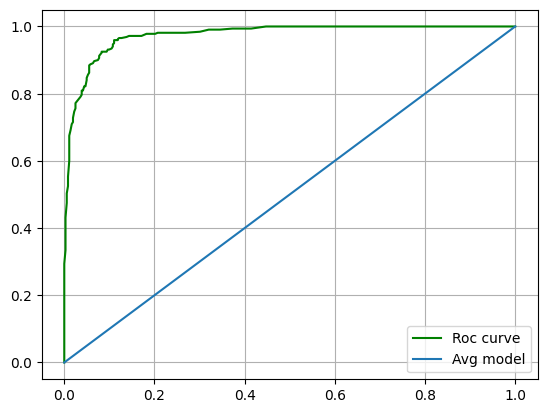

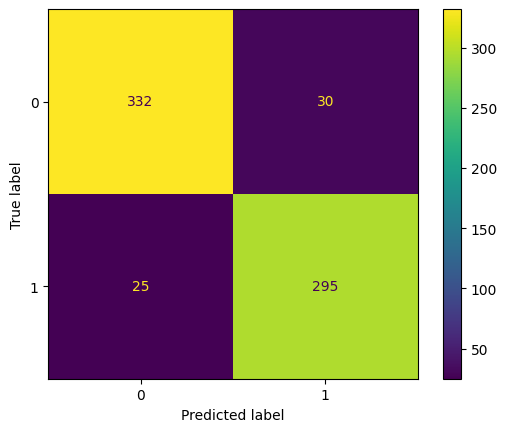

In [5]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"C:\Users\amahe\Downloads\preprocessd_data_cleaned.csv")
X = data.drop("churn",axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,    \
                            f1_score,         \
                            confusion_matrix,   \
                            ConfusionMatrixDisplay,\
                            roc_auc_score,roc_curve

tp = np.sum((y_test == 1) & (y_pred == 1)) #tn
tn = np.sum((y_test == 0) & (y_pred == 0))  # tp
fp = np.sum((y_test == 0) & (y_pred == 1))  # fp
fn = np.sum((y_test == 1) & (y_pred == 0)) #fn

print(f"tp:{tp}, tn {tn}, fp: {fp}, rn: {fn}")
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) 
recall = tp / (tp + fn) 
f1_score = 2 * precision * recall / (precision + recall)

prob =  rf.predict_proba(X_test)
level_1_proba = prob[:,1]
level_1_proba
fpr,tpr,threshold=roc_curve(y_test,level_1_proba)
plt.plot(fpr,tpr,color="green",label ="Roc curve")
plt.plot([0,1],[0,1],label="Avg model")
plt.legend()
plt.grid()
from sklearn.metrics import auc
auc=auc(fpr,tpr)
cmt = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cmt).plot()

metrics = [accuracy,precision,recall,f1_score,auc]
columns = ["Accuracy","precison","recall","f1_score","auc_score"]

random_forest =pd.DataFrame(metrics,columns,columns=["random forest"])
random_forest

In [6]:
X = data.drop("churn",axis=1)
y = data["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

In [7]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
grid_rf = RandomForestClassifier()            # base model
grid_rf

RandomForestClassifier()

In [20]:
param_grid ={
    "criterion":["gini","entropy"],    #2
    "max_depth": [3,4,5,6,7,8],       #6
    "min_samples_split":[2,3,4],      #3
    "min_samples_leaf":[1,2,3,4],     #4
    "random_state":[0,42]  #2
}

In [21]:

grid_search = RandomizedSearchCV(grid_rf,param_grid,scoring="accuracy",cv=5,verbose=True)
# verbose - True  i will show you in deep learing indetail

In [22]:
grid_search

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'random_state': [0, 42]},
                   scoring='accuracy', verbose=True)

In [23]:
grid_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'random_state': [0, 42]},
                   scoring='accuracy', verbose=True)>

In [24]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'random_state': [0, 42]},
                   scoring='accuracy', verbose=True)

In [25]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, random_state=42)

In [26]:
grid_search.best_params_


{'random_state': 42,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'gini'}

In [27]:
grid_search.best_score_


0.8773913923367512

In [28]:
grid_search.cv_results_["params"]


[{'random_state': 0,
  'min_samples_split': 3,
  'min_samples_leaf': 1,
  'max_depth': 3,
  'criterion': 'gini'},
 {'random_state': 0,
  'min_samples_split': 3,
  'min_samples_leaf': 2,
  'max_depth': 3,
  'criterion': 'entropy'},
 {'random_state': 42,
  'min_samples_split': 4,
  'min_samples_leaf': 1,
  'max_depth': 6,
  'criterion': 'gini'},
 {'random_state': 42,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 8,
  'criterion': 'gini'},
 {'random_state': 0,
  'min_samples_split': 3,
  'min_samples_leaf': 2,
  'max_depth': 7,
  'criterion': 'gini'},
 {'random_state': 42,
  'min_samples_split': 3,
  'min_samples_leaf': 3,
  'max_depth': 8,
  'criterion': 'entropy'},
 {'random_state': 0,
  'min_samples_split': 3,
  'min_samples_leaf': 4,
  'max_depth': 4,
  'criterion': 'entropy'},
 {'random_state': 0,
  'min_samples_split': 4,
  'min_samples_leaf': 3,
  'max_depth': 7,
  'criterion': 'gini'},
 {'random_state': 0,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'm

In [29]:
grid_search.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_random_state', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'param_criterion', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [30]:
col1=grid_search.cv_results_["split0_test_score"]
col2=grid_search.cv_results_["split1_test_score"]
col3=grid_search.cv_results_["split2_test_score"]
col4=grid_search.cv_results_["split3_test_score"]
col5=grid_search.cv_results_["split4_test_score"]

mean_test = grid_search.cv_results_["mean_test_score"]

df =pd.DataFrame(zip(col1,col2,col3,col4,col5,mean_test),index = grid_search.cv_results_["params"],columns=["cv1","cv2","cv3","cv4","cv5","mean_test_score"])

avg = [ sum(i[:-1])/5 for i in df.values]
# print("maximum avg",max(avg))
df["average"] = avg
df

,cv1,cv2,cv3,cv4,cv5,mean_test_score,average
"{'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}",0.834862,0.833028,0.867890,0.831193,0.851103,0.843615,0.843615
"{'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'entropy'}",0.836697,0.834862,0.851376,0.831193,0.854779,0.841782,0.841782
"{'random_state': 42, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'gini'}",0.844037,0.851376,0.882569,0.849541,0.875000,0.860505,0.860505
"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'gini'}",0.873394,0.871560,0.884404,0.866055,0.891544,0.877391,0.877391
"{'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}",0.856881,0.860550,0.882569,0.855046,0.878676,0.866744,0.866744
"{'random_state': 42, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8, 'criterion': 'entropy'}",0.867890,0.867890,0.884404,0.860550,0.886029,0.873353,0.873353
"{'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 4, 'criterion': 'entropy'}",0.840367,0.838532,0.864220,0.840367,0.860294,0.848756,0.848756
"{'random_state': 0, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'gini'}",0.858716,0.856881,0.877064,0.856881,0.876838,0.865276,0.865276
"{'random_state': 0, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}",0.856881,0.860550,0.882569,0.855046,0.878676,0.866744,0.866744
"{'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}",0.842202,0.840367,0.873394,0.844037,0.863971,0.852794,0.852794


In [31]:
np.max(df["average"].values) == grid_search.best_score_

True

In [33]:
np.argmax(df["average"])

3

In [34]:
grid_search.cv_results_['params'][3]

{'random_state': 42,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'gini'}

In [35]:
accuracy_list = cross_val_score(grid_search.best_estimator_,X_train, y_train,cv=5,scoring="accuracy")

In [36]:
accuracy_list

array([0.8733945 , 0.87155963, 0.88440367, 0.86605505, 0.89154412])

In [37]:
accuracy_list.mean()

0.8773913923367512

In [38]:
import joblib

In [39]:
path = "RF.joblib"
model = grid_search.best_estimator_
joblib.dump(model,path)

['RF.joblib']